<a href="https://colab.research.google.com/github/josenomberto/UTEC-CDIAV3-MCD8010/blob/main/proyecto1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCD8010 - MACHINE LEARNING

## Regression Challenge 1: Online News Popularity

*   Alejandro Pinedo
*   David Jimenez
*   Jose Carlos Nomberto

## Objectivo:
Predecit the number of shares of online news

# 1. Analisis Exploratorio (EDA)


Se realiza el Análisis Exploratorio de Datos (EDA) en el conjunto de datos `OnlineNewsPopularity.csv`, que incluye la inspección inicial de los datos, estadísticas descriptivas, análisis de la variable objetivo ('shares'), identificación de valores atípicos y ruido, y análisis de correlación. Finalmente, se resumen los hallazgos sobre las características del conjunto de datos, la etiqueta objetivo, el tamaño, los tipos de datos, los valores faltantes, los valores atípicos identificados, el ruido y cualquier posible desequilibrio.

## 1.1 Importar librerias requeridas

Importar librerias requeridas: pandas, matplotlib, seaborn, etc

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## 1.2 Carga de base de datos


Se carga el conjunto de datos `OnlineNewsPopularity.csv` en un DataFrame de pandas llamado `df` y se muestran las primeras filas para verificación

In [ ]:
#print("\n1. Loading Dataset into dataframe.")
#try:
#  df = pd.read_csv('/content/OnlineNewsPopularity.csv')
#  print("\n     Dataset loaded successfully.")
#  df.head()
#except error as e:
#  print(f"\n     Error loading dataset: {e}")

print("\n1. Loading Dataset into dataframe.")
df = pd.read_csv('/content/OnlineNewsPopularity.csv')
print("\n     Dataset loaded successfully.")
df.head()



1. Loading Dataset into dataframe.

     Dataset loaded successfully.


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## 1.2 Inspección Inicial de datos


Se realiza la inspección inicial de los datos:

* Mostrar las dimensiones (número de filas y columnas) del DataFrame mediante el atributo .shape para validar su tamaño.
* Mostrar un resumen del DataFrame, incluyendo los tipos de datos y los valores no nulos mediante el método .info().
* Identificar los valores faltantes en el conjunto de datos mediante los métodos .isnull().sum() en el df del DataFrame.




In [ ]:
print(f"\n2. Initial Data Inspection")

print(f"\n2.1 Dimensions:")
print(f"Dataset dimensions: {df.shape[0]} rows, {df.shape[1]} columns")

print(f"\n2.1 Info:")
df.info()
df.describe()

print(f"\n2.2 Missing Values:")
missing_values = df.isnull().sum()
print("Missing values per column:")
#print(missing_values[missing_values > 0])
print(missing_values)
print(f"{missing_values[missing_values > 0]}")



2. Initial Data Inspection

2.1 Dimensions:
Dataset dimensions: 39644 rows, 61 columns

2.1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64

## 1.2 Análisis Descriptivo


Genere estadísticas descriptivas para todas las columnas numéricas usando `df.describe()` para obtener un resumen de la tendencia central, la dispersión y la forma de la distribución, lo que puede ayudar a identificar posibles valores atípicos.


In [ ]:
#descriptive_stats = df.describe()
#print("Descriptive Statistics for Numerical Columns:")
#print(descriptive_stats)

print(f"\n3. Descriptive Statistics for Numerical Columns")

df.describe()


3. Descriptive Statistics for Numerical Columns


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## 1.4 Análisis de la variable objetivo

Analice la distribución de la variable objetivo, "participaciones", mediante un histograma y un diagrama de caja. Este paso ayudará a identificar su distribución, asimetría y la presencia de valores atípicos.

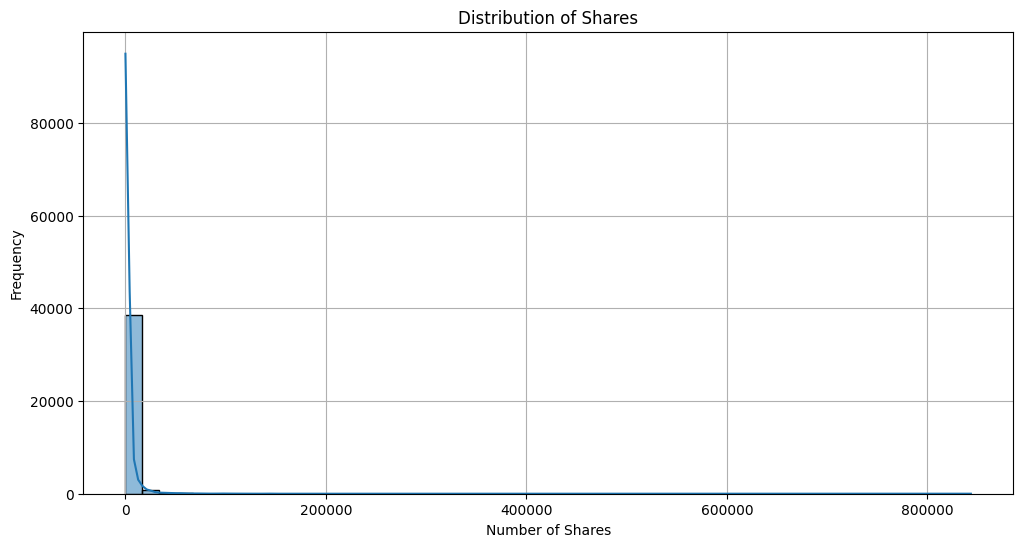

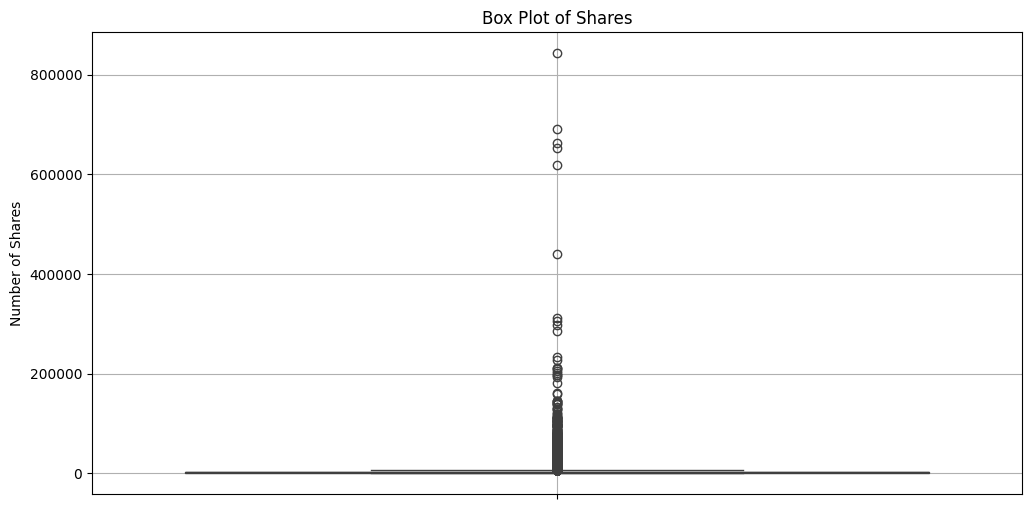

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Create a histogram of the 'shares' column

#print(df.columns)
plt.figure(figsize=(12, 6))
sns.histplot(df[' shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a box plot of the 'shares' column
plt.figure(figsize=(12, 6))
sns.boxplot(y=df[' shares'])
plt.title('Box Plot of Shares')
plt.ylabel('Number of Shares')
plt.grid(True)
plt.show()

## 1.5 Identificar valores atípicos y ruido

Visualice la distribución de características numéricas clave utilizando histogramas y diagramas de caja para identificar posibles valores atípicos, asimetrías y ruido que podrían afectar el modelo de regresión.


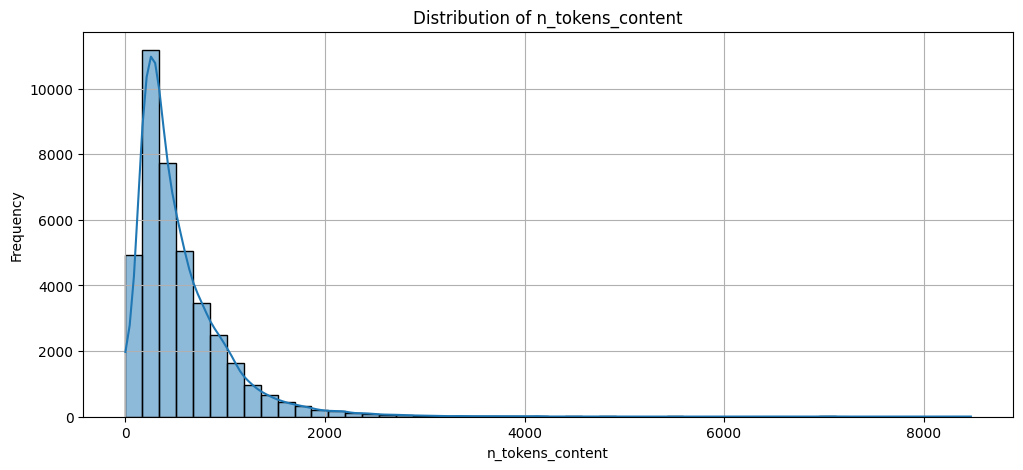

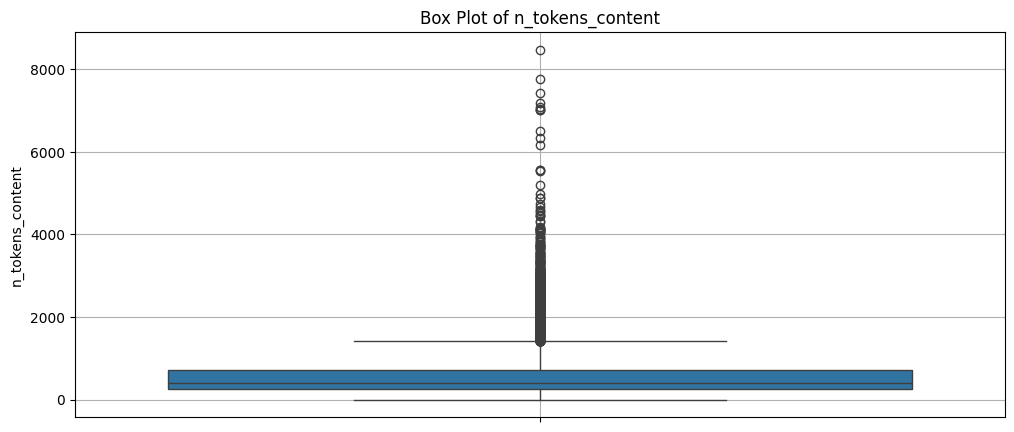

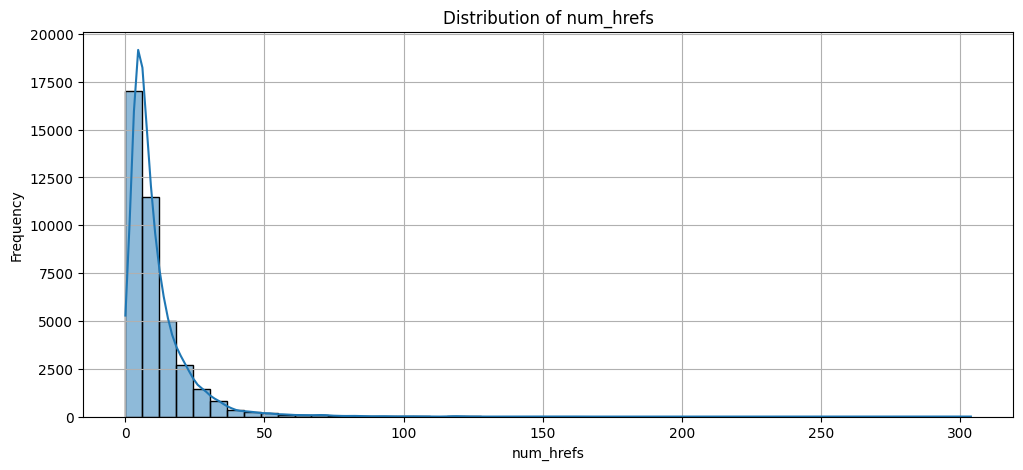

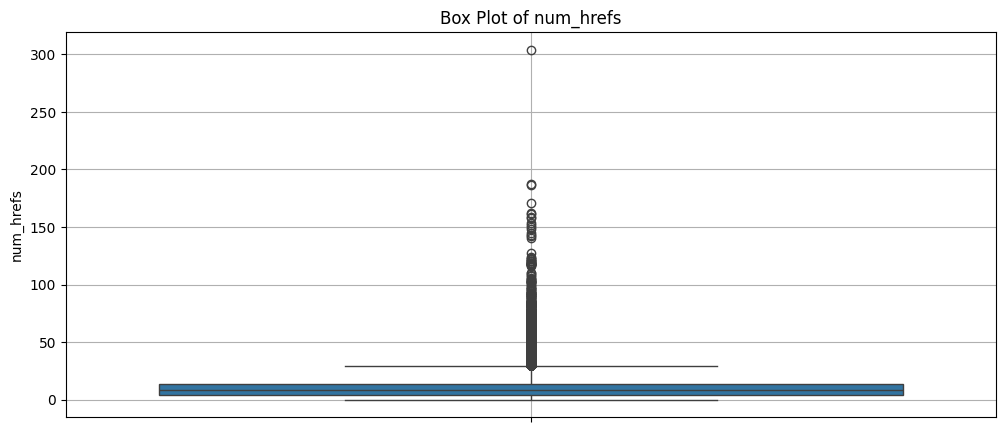

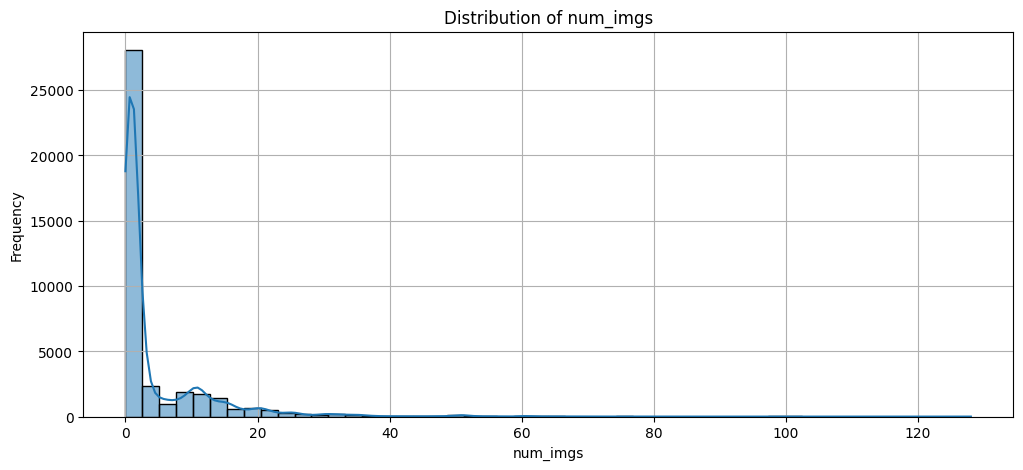

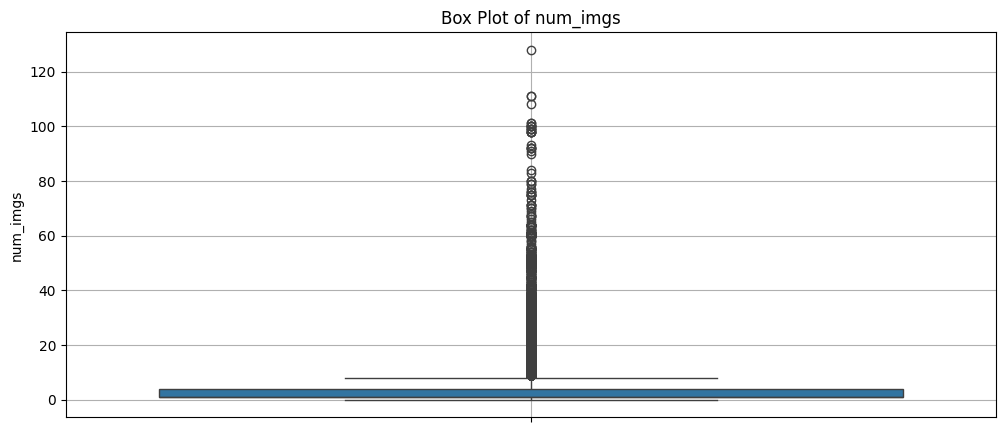

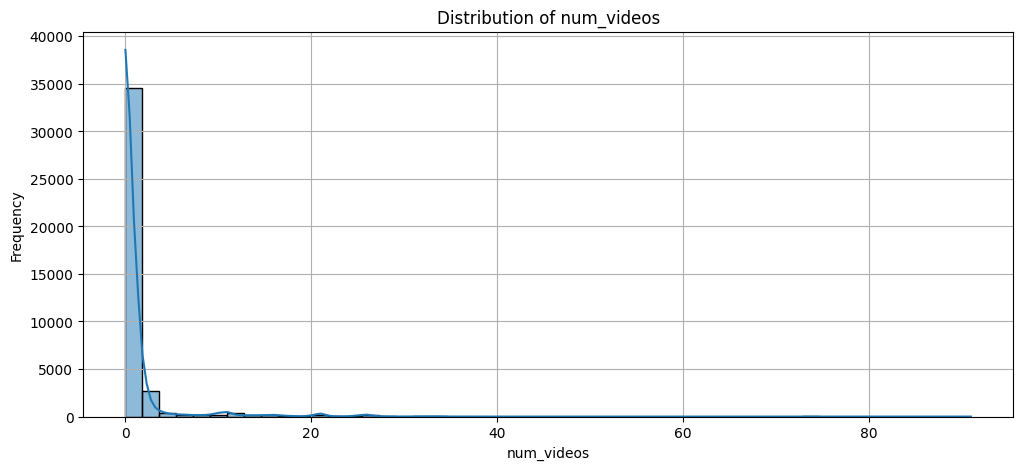

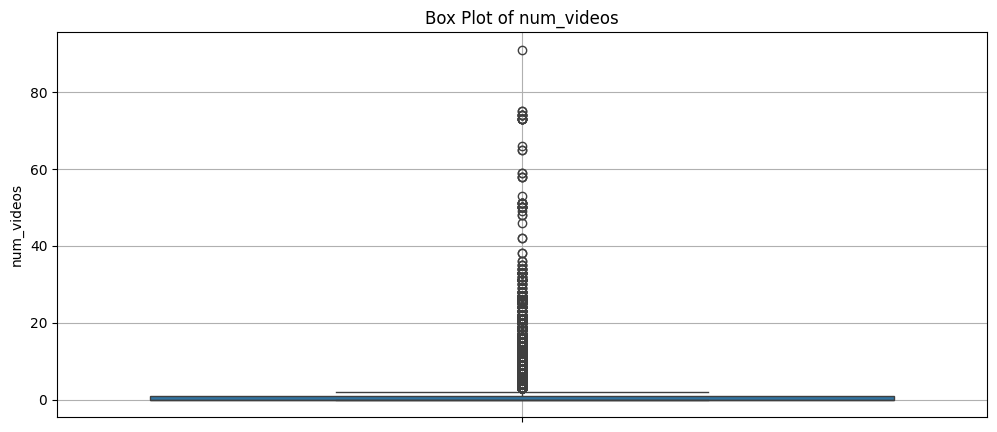

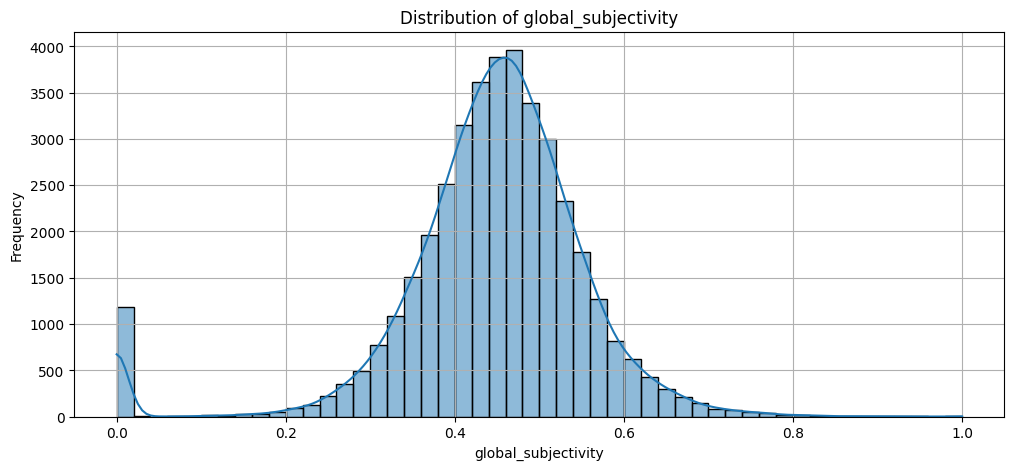

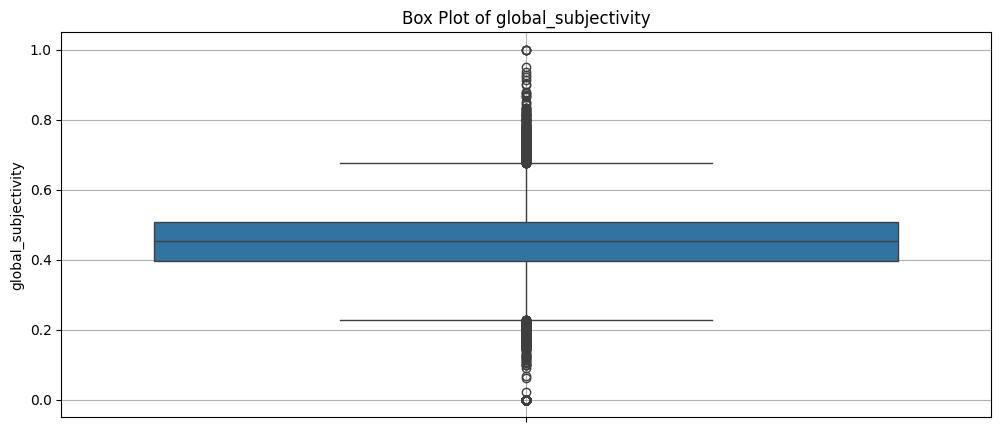

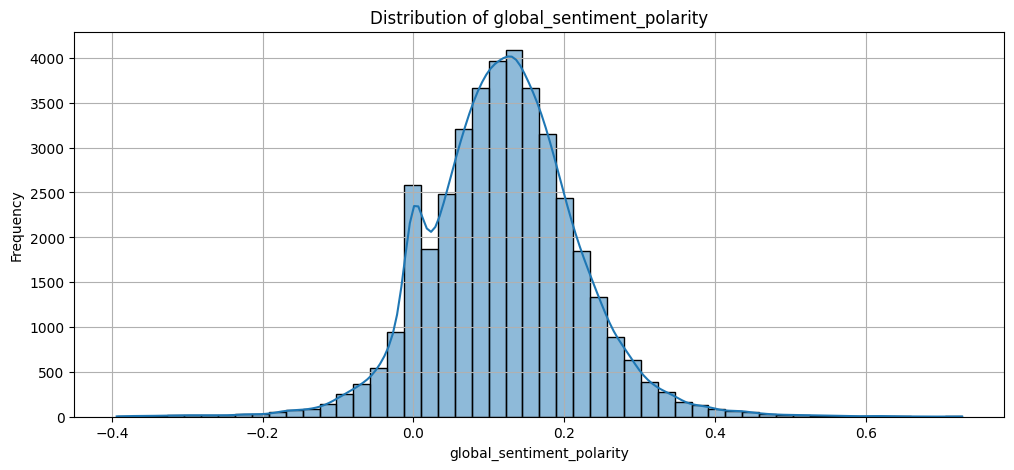

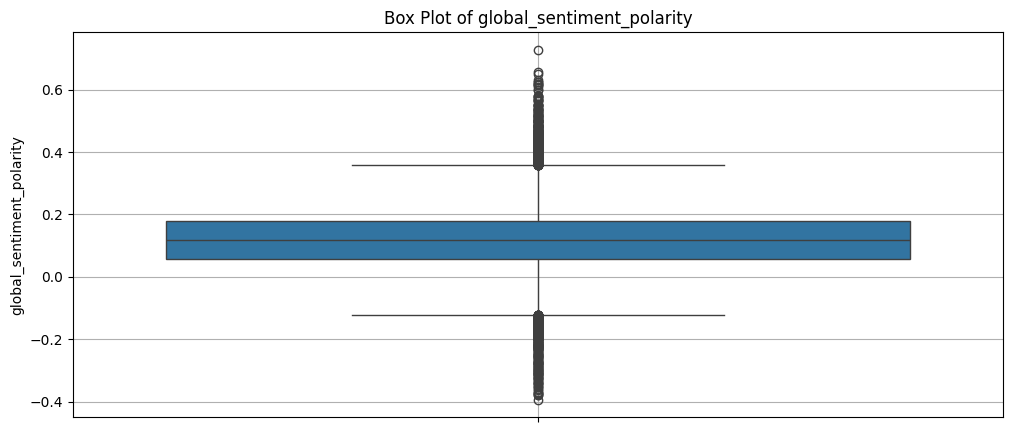

In [ ]:
key_features = [' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', ' global_subjectivity', ' global_sentiment_polarity']

for feature in key_features:
    # Create a histogram
    plt.figure(figsize=(12, 5))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature.strip()}')
    plt.xlabel(feature.strip())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Create a box plot
    plt.figure(figsize=(12, 5))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature.strip()}')
    plt.ylabel(feature.strip())
    plt.grid(True)
    plt.show()

## 1.6 Análisis de Correlación

Calcular y visualizar la matriz de correlación entre todas las características numéricas y la variable objetivo 'shares'.



Correlations with 'shares' column:
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0.00972

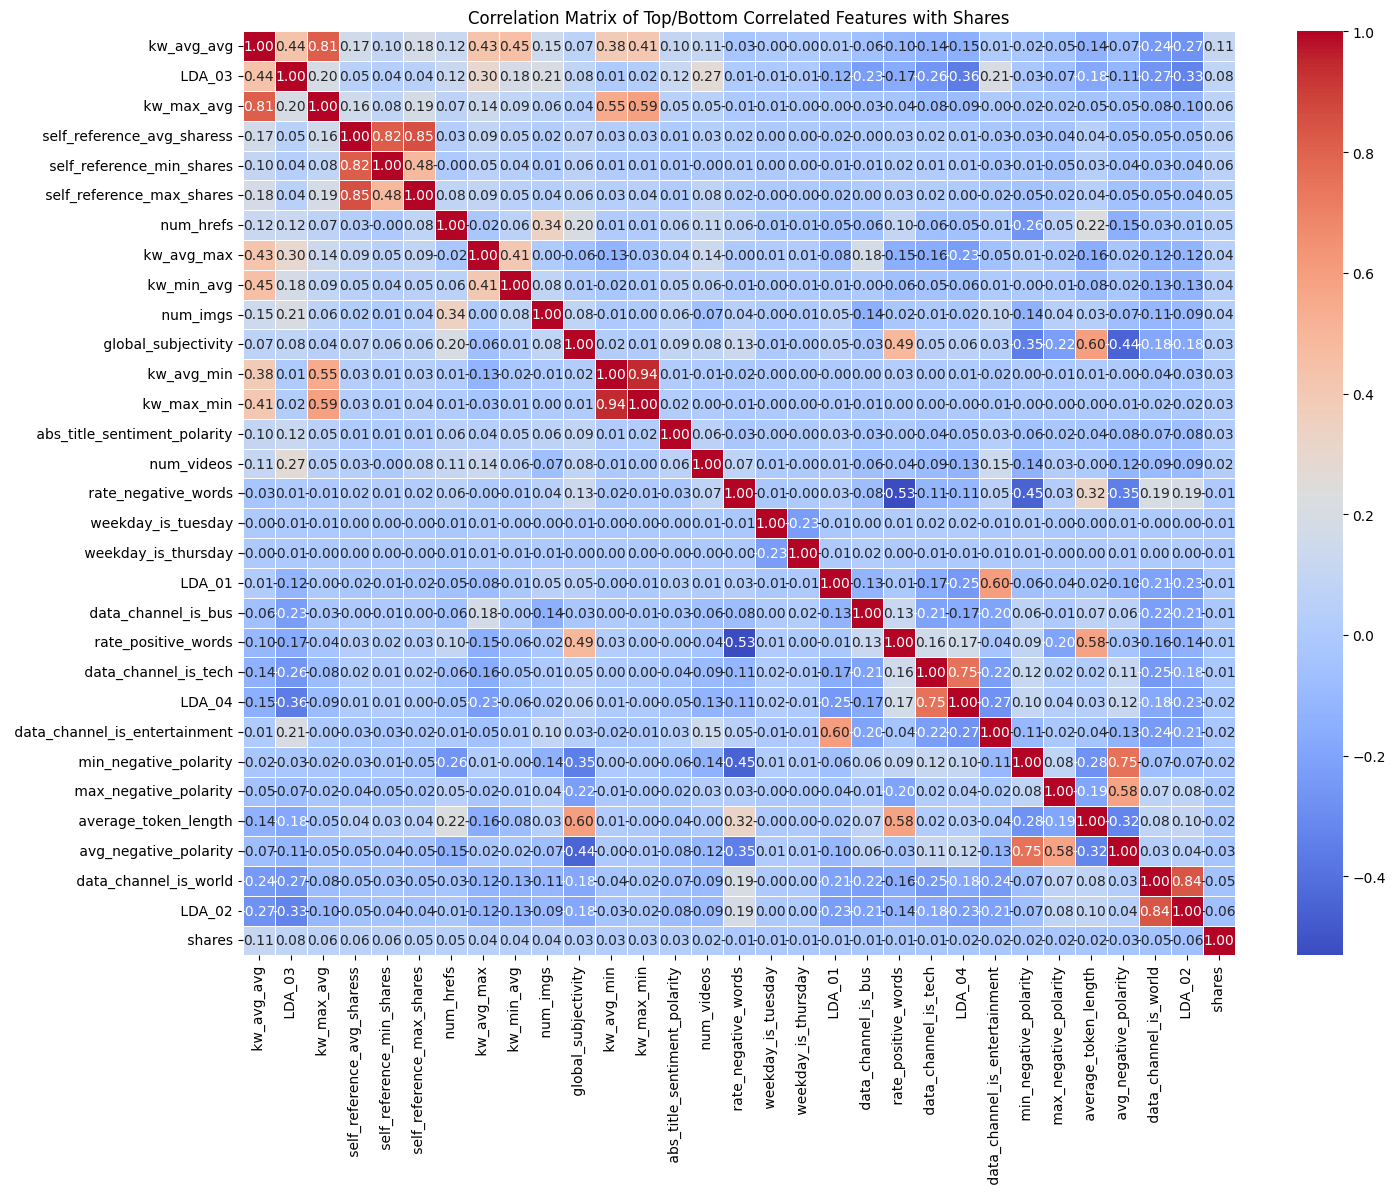

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Create a copy of the DataFrame and drop the 'url' column (non-numerical)
df_numerical = df.drop('url', axis=1)

# 1. Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# 2. Extract correlations with ' shares' column
shares_correlation = correlation_matrix[' shares'].sort_values(ascending=False)

# 3. Exclude ' shares' itself from the list
shares_correlation = shares_correlation.drop(' shares')

print("\nCorrelations with 'shares' column:")
print(shares_correlation)

# 4. Print top 10 most correlated features
print("\nTop 15 most correlated features with 'shares':")
print(shares_correlation.head(10))

# Print bottom 10 least correlated features
print("\nBottom 15 least correlated features with 'shares':")
print(shares_correlation.tail(10))

# 5. Create a heatmap for a subset of the correlation matrix
# Select top 15 positive and top 15 negative correlated features for visualization
top_correlated_features = shares_correlation.head(15).index.tolist()
bottom_correlated_features = shares_correlation.tail(15).index.tolist()
selected_features = top_correlated_features + bottom_correlated_features + [' shares']

plt.figure(figsize=(16, 12))
sns.heatmap(df_numerical[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Top/Bottom Correlated Features with Shares')
plt.show()


## 1.7 Resumen de los hallazgos del Análisis Exploratorio

### Resumen del conjunto de datos
- **Tamaño**: El conjunto de datos contiene `39644` filas y `61` columnas.
- **Tipos de datos**: El conjunto de datos se compone principalmente de características numéricas (`float64` e `int64`), con una columna de tipo `object` (`url`).
- **Valores faltantes**: No hay valores faltantes en ninguna de las columnas.

### Análisis de la variable objetivo ('shares')
- **Distribución**: La variable `shares` presenta una marcada desviación a la derecha, lo que muestra que la mayoría de los artículos reciben un número relativamente bajo de compartidos, mientras que un pequeño número de artículos se viralizan y reciben un número muy alto de compartidos. Esto se evidencia tanto en el histograma como en el diagrama de caja.
- **Valores atípicos**: el diagrama de caja muestra claramente una cantidad significativa de valores atípicos para los compartidos, con valores que se extienden mucho más allá de la distribución principal, lo que sugiere que los artículos muy populares son comunes en el conjunto de datos.

### Valores atípicos y ruido en las características clave
- **`n_tokens_content` (Número de palabras del contenido)**: La distribución está sesgada a la derecha, con muchos artículos con contenido más corto y algunos con contenido muy extenso. Se presentan valores atípicos con un número de palabras extremadamente alto.
- **`num_hrefs` (Número de enlaces)**: También sesgado a la derecha, lo que indica que la mayoría de los artículos tienen pocos enlaces, pero algunos tienen muchos. Se observan valores atípicos con un alto número de enlaces.
- **`num_imgs` (Número de imágenes)**: Similar a content y hrefs, la distribución está sesgada a la derecha, con un gran número de artículos con pocas imágenes y algunos con muchas. Muchos valores atípicos indican artículos con un número inusualmente alto de imágenes.
- **`num_videos` (Número de vídeos)**: La mayoría de los artículos no tienen vídeos, como lo muestra el pico en cero. Hay valores atípicos que representan artículos con un número significativo de vídeos.
- **`global_subjectivity`**: La distribución parece más dispersa, con valores de 0 a 1, con una ligera desviación a la izquierda, lo que sugiere que muchos artículos tienen puntuaciones de subjetividad más altas. No se identificaron valores atípicos extremos.
- **`global_sentiment_polarity`**: La distribución se centra alrededor de 0, lo que indica un sentimiento generalmente neutral, pero con un rango de negativo a positivo. Muestra una distribución bastante normal con algunos valores en los extremos.

### Análisis de correlación

La correlación entre la mayoría de las características y la variable objetivo `shares` es relativamente débil, con la correlación absoluta más alta alrededor de `0,11`.

**Las 10 características más correlacionadas (positivas)**:
- `kw_avg_avg`: Popularidad promedio de las palabras clave (correlación más alta).
- `LDA_03`: Tema 3 de la asignación de Dirichlet latente.
- `kw_max_avg`: Popularidad promedio máxima de las palabras clave.
- `self_reference_avg_sharess`: Promedio de shares de artículos autorreferenciados.
- `self_reference_min_shares`: Mínimo de shares de artículos autorreferenciados.
- `self_reference_max_shares`: Máximo de shares de artículos autorreferenciados.
- `num_hrefs`: Número de enlaces. - `kw_avg_max`: Promedio de la popularidad máxima de las palabras clave.
- `kw_min_avg`: Promedio de la popularidad mínima de las palabras clave.
- `num_imgs`: Número de imágenes.


**Las 10 características menos correlacionadas (negativas)**:
- `rate_positive_words`: Tasa de palabras positivas.
- `data_channel_is_tech`: Indicador del canal de tecnología.
- `LDA_04`: Tema 4 de asignación de Dirichlet latente.
- `data_channel_is_entertainment`: Indicador del canal de entretenimiento.
- `min_negative_polarity`: Polaridad negativa mínima.
- `max_negative_polarity`: Polaridad negativa máxima.
- `average_token_length`: Longitud promedio de los tokens.
- `avg_negative_polarity`: Polaridad negativa promedio.
- `data_channel_is_world`: Indicador del canal de noticias internacionales.
- `LDA_02`: Tema 2 de asignación de Dirichlet latente (con mayor correlación negativa).


**Observaciones clave**: Las características relacionadas con la popularidad de las palabras clave (`kw_avg_avg`, `kw_max_avg`, `kw_min_avg`, `kw_avg_max`) y la autorreferencia (`self_reference_avg_sharess`, `self_reference_min_shares`, `self_reference_max_shares`) muestran las correlaciones positivas más fuertes, aunque aún relativamente bajas. Los temas de LDA y los indicadores de canales de datos también aparecen en listas con correlaciones tanto positivas como negativas, lo que sugiere que su influencia varía según el tema o canal específico. Las características relacionadas con el sentimiento y las métricas de longitud del contenido muestran correlaciones muy débiles con las veces que se comparte.


### Perspectivas y próximos pasos

* **Gestionar la asimetría de los datos y los valores atípicos**: Dada la extrema asimetría y la presencia de numerosos valores atípicos en las "cuotas" de la variable objetivo y varias características clave, considere aplicar transformaciones (por ejemplo, transformación logarítmica) a estas variables. Esto podría ayudar a normalizar sus distribuciones y mejorar el rendimiento del modelo.
* **Explorar la ingeniería de características**: Con correlaciones generalmente débiles, una ingeniería de características más profunda basada en el conocimiento del dominio o en combinaciones de características existentes podría ser beneficiosa para crear variables más predictivas. En concreto, un análisis más profundo de los temas de LDA y los indicadores de canal podría revelar relaciones más matizadas.





# END OF EDA


### Feature Engineering for Channel Indicators and LDA Topics

**Reasoning**:
Based on the previous correlation analysis and the nature of the dataset, creating aggregated features from the channel indicators and identifying the dominant LDA topic can provide more informative signals to the model. This step aims to capture more nuanced relationships and potentially stronger predictive power than individual, weakly correlated features.

**1. Feature Engineering: Channel Indicators**

We will create a new binary feature, `is_tech_bus_world`, which will be `1` if an article belongs to either the 'data_channel_is_tech', 'data_channel_is_bus', or 'data_channel_is_world' channels, and `0` otherwise. This can simplify the channel information and might represent a broader 'hard news' category.

Distribution of 'is_tech_bus_world' channel:
is_tech_bus_world
1    22031
0    17613
Name: count, dtype: int64


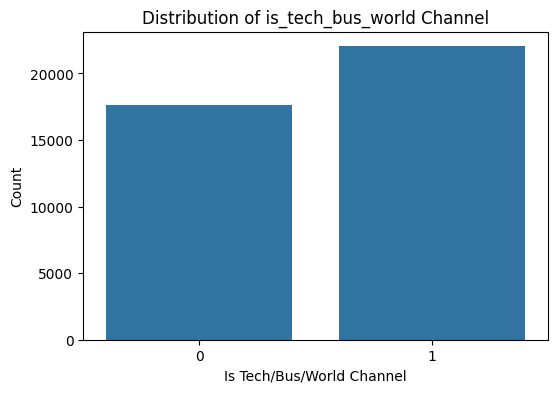

In [ ]:
# Create a new combined channel indicator
df['is_tech_bus_world'] = df[' data_channel_is_tech'] + df[' data_channel_is_bus'] + df[' data_channel_is_world']
df['is_tech_bus_world'] = df['is_tech_bus_world'].apply(lambda x: 1 if x > 0 else 0)

print("Distribution of 'is_tech_bus_world' channel:")
print(df['is_tech_bus_world'].value_counts())

# Visualize the distribution of the new feature
plt.figure(figsize=(6, 4))
sns.countplot(x=df['is_tech_bus_world'])
plt.title('Distribution of is_tech_bus_world Channel')
plt.xlabel('Is Tech/Bus/World Channel')
plt.ylabel('Count')
plt.show()

## Implementation of Recommendations

### 1. Handling Data Skewness and Outliers

**Reasoning**:
The 'shares' target variable and several count-based features exhibit high right skewness and numerous outliers. Applying a log transformation (specifically `np.log1p` to handle zero values) can help normalize these distributions, making them more suitable for regression models and potentially improving model performance.

Original 'shares' descriptive statistics:
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

Transformed 'shares_log' descriptive statistics:
count    39644.000000
mean         7.475692
std          0.929674
min          0.693147
25%          6.853299
50%          7.244942
75%          7.937732
max         13.645079
Name: shares_log, dtype: float64


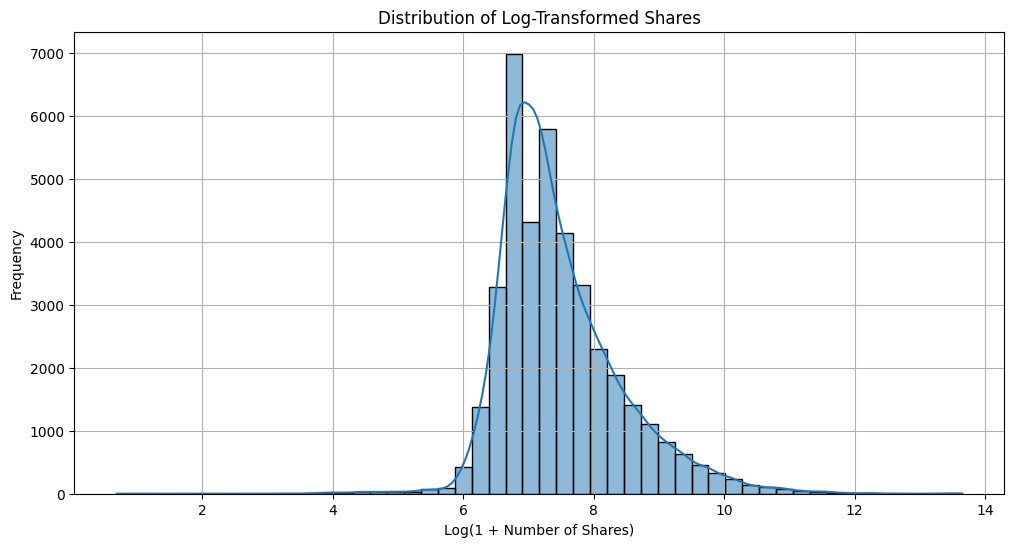

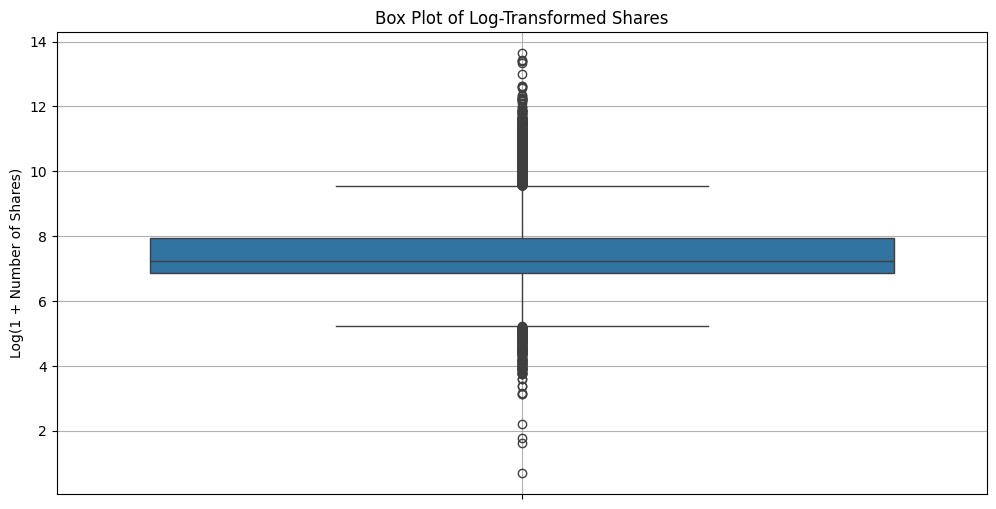


Original 'n_tokens_content' descriptive statistics:
count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name:  n_tokens_content, dtype: float64

Transformed 'n_tokens_content_log' descriptive statistics:
count    39644.000000
mean         5.889971
std          1.255442
min          0.000000
25%          5.509388
50%          6.016157
75%          6.575076
max          9.044876
Name: n_tokens_content_log, dtype: float64

Original 'num_hrefs' descriptive statistics:
count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name:  num_hrefs, dtype: float64

Transformed 'num_hrefs_log' descriptive statistics:
count    39644.000000
mean         2.156564
std          0.809445
min          0.000000
25%          1.609438
50%          2.197225
75%         

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation to the 'shares' column
# np.log1p(x) computes log(1+x), which handles zero values gracefully
df['shares_log'] = np.log1p(df[' shares'])

print("Original 'shares' descriptive statistics:")
print(df[' shares'].describe())
print("\nTransformed 'shares_log' descriptive statistics:")
print(df['shares_log'].describe())

# Visualize the transformed 'shares_log' distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['shares_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Shares')
plt.xlabel('Log(1 + Number of Shares)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['shares_log'])
plt.title('Box Plot of Log-Transformed Shares')
plt.ylabel('Log(1 + Number of Shares)')
plt.grid(True)
plt.show()

# Also apply log transformation to other highly skewed features identified during EDA
skewed_features = [' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos']
for feature in skewed_features:
    # Create a new log-transformed column, e.g., 'n_tokens_content_log'
    df[feature.strip() + '_log'] = np.log1p(df[feature])
    print(f"\nOriginal '{feature.strip()}' descriptive statistics:")
    print(df[feature].describe())
    print(f"\nTransformed '{feature.strip()}_log' descriptive statistics:")
    print(df[feature.strip() + '_log'].describe())

# FSNT

In [ ]:
!pip install causal-learn
!pip install causal_discovery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.6.1
    Uninstalling networkx-3.6.1:
      Successfully uninstalled networkx-3.6.1
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.7.2
    Uninstalling jaxlib-0.7.2:
      Successfully uninstalled jaxlib-0.7.2
  Attempting uninstall: seaborn
    Found existing ins

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# IMPORTANTE: La ruta en esta librería es diferente
from causal_discovery.algos.notears import NoTears

# 1. Carga y preparación de datos
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = [col.strip() for col in df.columns]

# Selección de variables para el análisis
features_interes = ['n_tokens_title', 'num_hrefs', 'num_imgs', 'num_videos',
                    'average_token_length', 'global_subjectivity', 'is_weekend', 'shares']
data = df[features_interes].sample(1000, random_state=42)
data['shares'] = np.log1p(data['shares'])

# 2. Escalado (Crítico para que el gradiente de NOTEARS no explote)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. Configuración y ejecución de NoTears
# rho: parámetro de penalización de igualdad
# alpha: parámetro del Lagrangiano aumentado
# l1_reg: fuerza de la regularización (sparsity) para selección de variables
model = NoTears(rho=1.0, alpha=0.0, l1_reg=0.1, lr=1e-2)

# El método learn() entrena el modelo para descubrir el grafo
model.learn(data_scaled)

# 4. Obtención de la matriz de adyacencia (W)
# model.w_est contiene los pesos de las relaciones causales
W = model

# Extraemos los pesos hacia 'shares' (última columna)
causal_weights = pd.Series(W[:, -1], index=features_interes)
causal_selection = causal_weights.drop('shares').sort_values(ascending=False)

print("Variables con mayor relevancia CAUSAL (vía causal-discovery):")
print(causal_selection[causal_selection != 0])

100%|██████████| 20/20 [00:07<00:00,  2.77it/s]


TypeError: 'NoTears' object is not subscriptable

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# CORRECCIÓN: Ruta de importación correcta en causallearn
from causallearn.search.ScoreBased.NOTEARS import notears_linear

# 1. Carga y preparación
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = [col.strip() for col in df.columns]

# Seleccionamos variables numéricas clave y el target
features_interes = [
    'n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs',
    'num_videos', 'average_token_length', 'global_subjectivity',
    'global_sentiment_polarity', 'is_weekend', 'shares'
]

# Usamos una muestra para eficiencia (NOTEARS es computacionalmente costoso)
data = df[features_interes].sample(2000, random_state=42)
data['shares'] = np.log1p(data['shares']) # Transformación logarítmica para normalizar

# 2. Escalado (Indispensable para la convergencia del algoritmo)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. Ejecución de FSNT (vía NOTEARS)
# El algoritmo busca la estructura de Grafo Acíclico Dirigido (DAG)
# Ajustamos lambda1 para controlar la dispersión (sparsity) de las conexiones
W = notears_linear(data_scaled, lambda1=0.1, loss_type='l2')

# 4. Extracción de Importancia Causal
# La matriz W es de tamaño [d, d].
# La última columna (índice -1) representa los pesos de las conexiones que ENTRAN a 'shares'.
causal_strengths = pd.Series(W[:, -1], index=features_interes)

# Eliminamos la auto-referencia (shares -> shares) y filtramos pesos significativos
causal_features = causal_strengths.drop('shares')
causal_features = causal_features[causal_features != 0].sort_values(ascending=False)

print("--- RESULTADOS DEL ANÁLISIS FSNT ---")
if causal_features.empty:
    print("No se detectaron influencias causales directas con el lambda actual.")
else:
    print("Variables con influencia CAUSAL directa sobre 'shares':")
    print(causal_features)

# Explicación del Grafo Causal resultante
#

ModuleNotFoundError: No module named 'causallearn.search.ScoreBased.NOTEARS'

### 2. Feature Engineering: Dominant LDA Topic

**Reasoning**:
The correlation analysis revealed generally weak correlations between individual features and the target variable 'shares'. This suggests that simply using the existing features as-is might not yield the best model performance. Feature engineering can help uncover more predictive power by creating new features or combining existing ones.

**Next Steps for Feature Engineering**:

*   **Combine channel indicators**: Create new categorical features that group multiple `data_channel_is_X` columns (e.g., 'data_channel_is_news' if an article belongs to bus, tech, or world news channels).
*   **Interaction features**: Explore interactions between seemingly unrelated features. For example, the product of 'number of images' and 'number of videos' might indicate rich media content.
*   **Polynomial features**: For features that show non-linear relationships with 'shares', polynomial features could be useful.
*   **Deeper analysis of LDA topics**: Investigate the actual words/themes associated with the LDA topics (`LDA_00` to `LDA_04`) to understand their context and potentially combine them or create new features based on topic dominance.
*   **Weekend/weekday analysis**: While `is_weekend` is already present, further explore how other features behave differently on weekends versus weekdays.
*   **Binning skewed features**: For highly skewed features, binning them into categories might capture non-linear effects better than their raw or log-transformed values for certain models.

### Subtask:
Create a new categorical feature, `dominant_LDA_topic`, by identifying the LDA topic (`LDA_00` to `LDA_04`) with the highest probability for each article. Visualize its distribution to understand the primary subject matter of the articles.


**Reasoning**:
To identify the dominant LDA topic for each article, I will select the relevant LDA columns, use `idxmax` to find the topic with the highest probability, create a new column for this dominant topic, and then visualize its distribution.



Distribution of 'dominant_LDA_topic':
dominant_LDA_topic
LDA_04    9585
LDA_03    9290
LDA_02    8617
LDA_00    7393
LDA_01    4759
Name: count, dtype: int64


/tmp/ipython-input-485141888.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['dominant_LDA_topic'], palette='viridis')


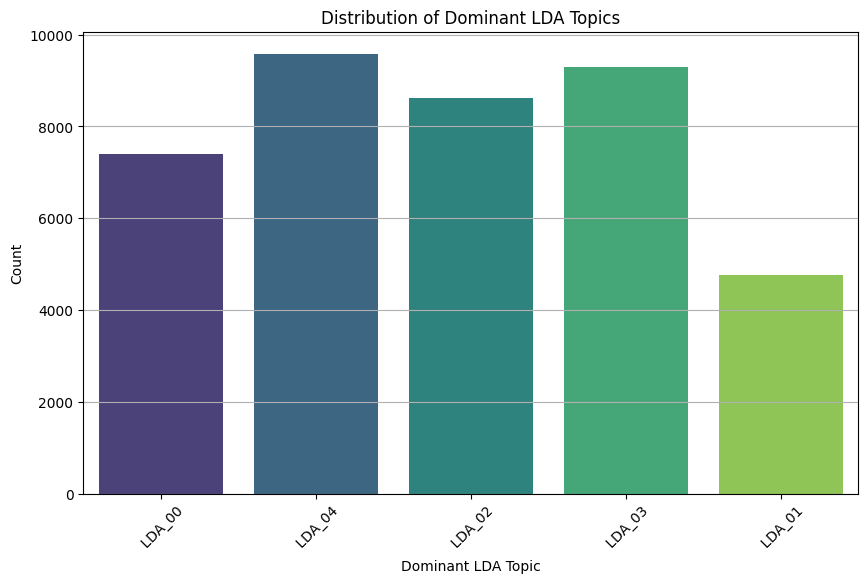

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select the LDA topic columns
lda_columns = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']

# 2. Identify the dominant LDA topic for each article
df['dominant_LDA_topic'] = df[lda_columns].idxmax(axis=1)

# 3. Print the value counts of the dominant_LDA_topic column
print("Distribution of 'dominant_LDA_topic':")
print(df['dominant_LDA_topic'].value_counts())

# 4. Create a count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df['dominant_LDA_topic'], palette='viridis')
plt.title('Distribution of Dominant LDA Topics')
plt.xlabel('Dominant LDA Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Reasoning**:
The previous code generated a FutureWarning due to the deprecated usage of `palette` without `hue` in `seaborn.countplot`. To address this, I will explicitly set the `hue` parameter to the same column as `x` and set `legend=False` as suggested by the warning.



Distribution of 'dominant_LDA_topic':
dominant_LDA_topic
LDA_04    9585
LDA_03    9290
LDA_02    8617
LDA_00    7393
LDA_01    4759
Name: count, dtype: int64


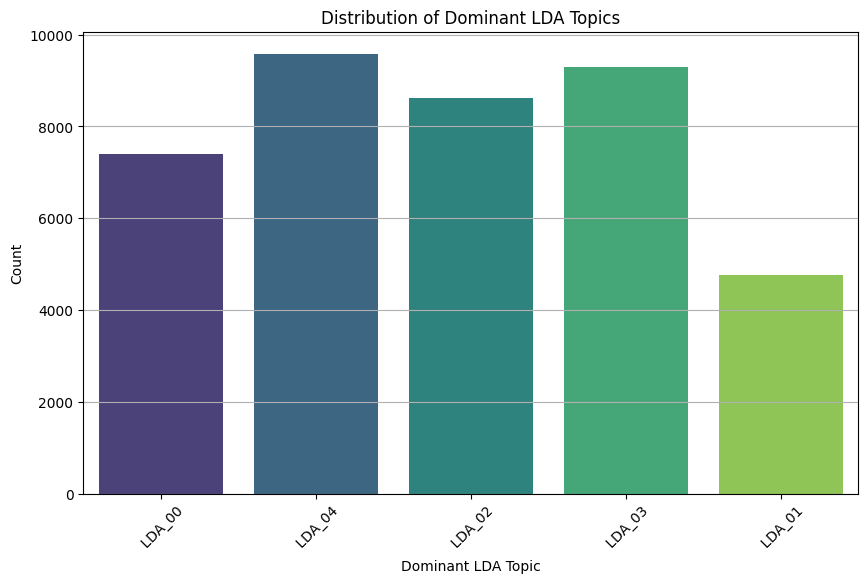

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select the LDA topic columns
lda_columns = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']

# 2. Identify the dominant LDA topic for each article
df['dominant_LDA_topic'] = df[lda_columns].idxmax(axis=1)

# 3. Print the value counts of the dominant_LDA_topic column
print("Distribution of 'dominant_LDA_topic':")
print(df['dominant_LDA_topic'].value_counts())

# 4. Create a count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df['dominant_LDA_topic'], hue=df['dominant_LDA_topic'], palette='viridis', legend=False)
plt.title('Distribution of Dominant LDA Topics')
plt.xlabel('Dominant LDA Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Final Task

### Subtask:
Summarize the findings from the Exploratory Data Analysis, including observations about the dataset's features, target label, size, data types, missing values, identified outliers, and any other potential difficulties like noise or imbalance.


## Summary:

### Data Analysis Key Findings
*   A new categorical feature, `dominant_LDA_topic`, was successfully created for each article by identifying the LDA topic (from `LDA_00` to `LDA_04`) with the highest probability.
*   The distribution of dominant topics indicates that `LDA_04` (9585 articles) and `LDA_03` (9290 articles) are the most frequently occurring primary subjects among the articles.
*   Conversely, `LDA_01` is the least dominant topic, representing the primary subject for only 4759 articles. The other topics, `LDA_02` and `LDA_00`, account for 8617 and 7393 articles respectively.
*   A count plot was successfully generated to visually represent the distribution of these dominant LDA topics, clearly showing their prevalence across the dataset.

### Insights or Next Steps
*   The varying dominance of LDA topics suggests that the article collection covers certain subject matters more extensively than others, which could influence downstream modeling or content strategies.
*   To gain deeper insights, the next step should involve examining the keywords or terms associated with each LDA topic to understand the specific themes or subjects that `LDA_04`, `LDA_03`, and other topics represent.
